In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn import metrics
from sklearn import ensemble



In [2]:
#loading data
boston_dataset=pd.read_csv('boston_house_prices.csv')


In [3]:
boston_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
boston_dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

C:\Users\aravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

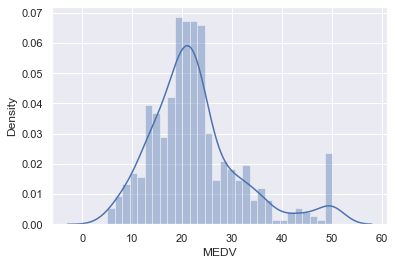

In [5]:
#Visualize
sns.set()
sns.distplot(boston_dataset["MEDV"],bins=30)

<AxesSubplot:>

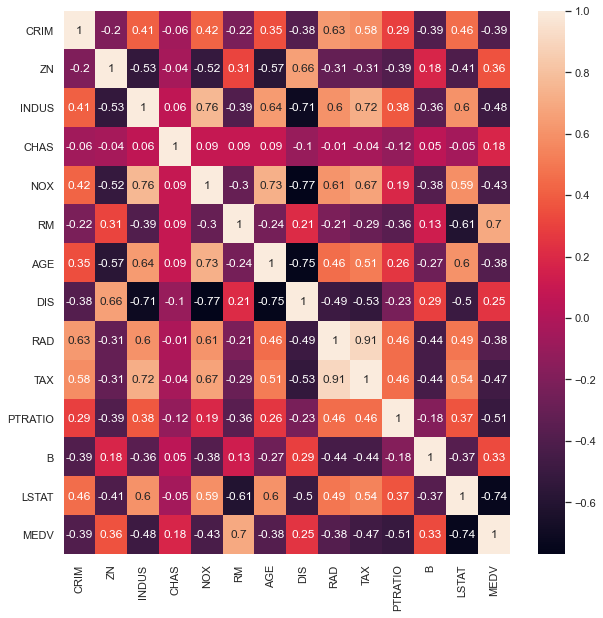

In [6]:
# Check if multicolinearity is present
correlation_matrix=boston_dataset.corr().round(2)
plt.figure(figsize=(10,10))
sns.heatmap(data=correlation_matrix,annot=True)

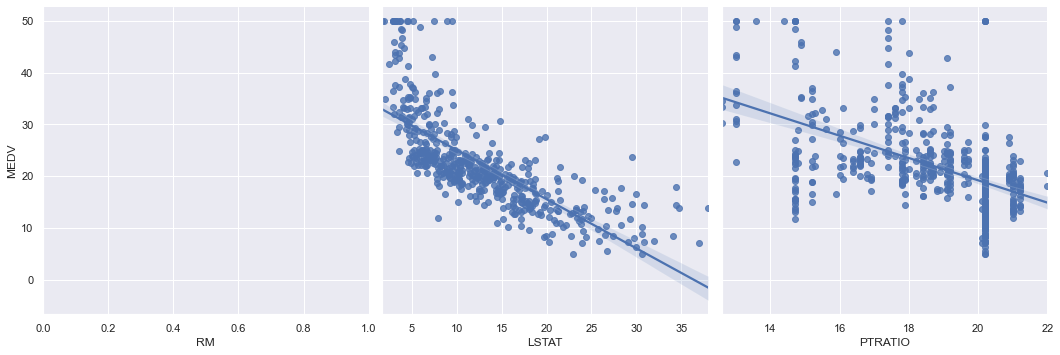

In [7]:
sns.pairplot(boston_dataset,x_vars=["RM","LSTAT","PTRATIO"],y_vars=["MEDV"],height=5, kind="reg")

In [8]:
#X= boston_dataset.drop([["RM","LSTAT","PTRATIO"]]
X= boston_dataset.drop(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'B',"MEDV"],axis=1)                   
Y=boston_dataset["MEDV"]

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 3)
(102, 3)
(404,)
(102,)


# Regularizatoin

- ### Avoid model complexity-  Prevent over fitting problem 
- ### how its done ? - Penalizing the Loss Function 
- ###  recommended only when there are more then 2 features in dataset

# L1 Regularization (Lasso -Least Absolute Shrinkage and Selection Operator)

- ### L1 penalizes sum of absolute value of weights
- ### Has sparse solution - most of the feature weights/coefficeints will be zero 
- ### Dose feature selection by shrinking the weights of features that  are not important to zero 
- ### Robust to outliers
- ### generates models that are simple and interpretable but cannot learn complex pattern



# L2 Regularization(Ridge)

- ### L2 penalizes sum of squared values of weight 
- ### Has non sparse solution 
- ### Dose not do feature section 
- ### Not robust to outliers
- ### Can learn complex pattern 


Note since we are dealing with mulitple features ,m/w is a vector and X is a matrix 

# Ridge Cost function
![](https://miro.medium.com/max/700/1*bnze-12WTFRjp3IN6kR-Gg.png)

# Lasso Cost Function
![](https://miro.medium.com/max/700/1*a5vrOtWS8_BuT3XnPhCSHg.png)

- lambda hyperparameter  which means that they are not automatically learned by the model instead they have to be set manually.
When choosing a lambda value, the goal is to strike the right balance between simplicity and training-data fit:

- if lambda is zero then you can imagine we get back OLS

- If your lambda value is too high, your model will be simple, but you run the risk of underfitting your data. Your model won't learn enough about the training data to make useful predictions.

- If we have a high λ value then multiplying lambda * coefs will increases the coefficients right? Why would it approx. to zero?The multiplication in question only occurs in the penalty term. The larger the penalty term, the smaller the coefficient values must be made in order to minimize the objective function. 


- If your lambda value is too low, your model will be more complex, and you run the risk of overfitting your data. Your model will learn too much about the particularities of the training data, and won't be able to generalize to new data.



In [10]:
# FUNCTION TO CHOOSE BEST ALPHA/LAMBDA VALUE 

def regularization(model,alpha_range):
    rmse_score_insample=[]
    rmse_score_outsample=[]
    r2_score_insample=[]
    r2_score_outsample=[]
    
    for i in alpha_range:
        reg_model=model(alpha=i,normalize=True)
        reg_model.fit(x_train,y_train)
        y_pred_train=reg_model.predict(x_train)
        #y_pred_train=y_pred_train.reshape(-1,1)
        y_pred_test=reg_model.predict(x_test)
        #y_pred_test=y_pred_test.reshape(-1,1)
        
        rmse_score_insample.append(np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))
        rmse_score_outsample.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
        r2_score_insample.append(metrics.r2_score(y_train,y_pred_train))
        r2_score_outsample.append(metrics.r2_score(y_test,y_pred_test))
    df=pd.DataFrame()
    df['alpha']=alpha_range
    df['rmse_score_insample']=rmse_score_insample
    df['rmse_score_outsample']=rmse_score_outsample
    df['r2_score_insample']=r2_score_insample
    df['r2_score_outsample']=r2_score_outsample
    #return df.plot(x='alpha',y=['rmse_score_insample','rmse_score_outsample'])
    return df.plot(x='alpha',y=['r2_score_insample','r2_score_outsample'])
    



In [11]:
x_train

,RM,PTRATIO,LSTAT
220,6.951,17.4,9.71
71,5.961,19.2,9.88
240,6.897,16.6,11.38
6,6.012,15.2,12.43
417,5.304,20.2,26.64
...,...,...,...
323,5.708,19.6,11.74
192,7.178,15.2,2.87
117,6.021,17.8,10.30
47,6.030,17.9,18.80


In [13]:
alpha_range_lasso=np.arange(0.01,0.1,0.01)
print(alpha_range_lasso)

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09]


AxesSubplot(0.125,0.125;0.775x0.755)


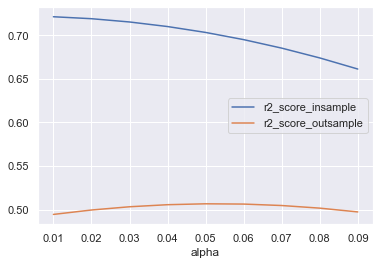

In [17]:
print(regularization(Lasso,alpha_range_lasso))

In [15]:
best_aplha=0.06

reg_model=Lasso(alpha=best_aplha,normalize=True)
reg_model.fit(x_train,y_train)
y_pred_train=reg_model.predict(x_train)
y_pred_train=y_pred_train
y_pred_test=reg_model.predict(x_test)
y_pred_test=y_pred_test
print(np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
print(metrics.r2_score(y_train,y_pred_train))
print(metrics.r2_score(y_test,y_pred_test))

5.096899280613644
6.339730101355357
0.6948878647946668
0.5064110497380598


In [16]:
alpha_range_ridge=np.arange(0.01,0.1,0.004)
print(alpha_range_ridge)

[0.01  0.014 0.018 0.022 0.026 0.03  0.034 0.038 0.042 0.046 0.05  0.054
 0.058 0.062 0.066 0.07  0.074 0.078 0.082 0.086 0.09  0.094 0.098]


AxesSubplot(0.125,0.125;0.775x0.755)


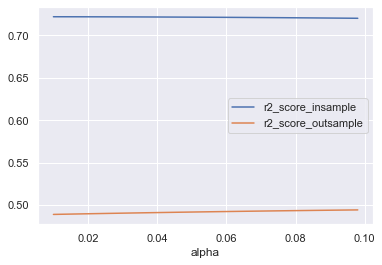

In [18]:
print(regularization(Ridge,alpha_range_ridge))

# Polynomial Regression 

![](https://static.javatpoint.com/tutorial/machine-learning/images/machine-learning-polynomial-regression.png)
- Non Linear regression ( weights/coefficients associated with features  are liners  but the features are non linear )

- Fit a curve instead of line (SML is n=1 polynomial regression)
- n is th degree of polynomial (The “degree” of the polynomial is used to control the number of features added, e.g. a degree of 3 will add two new variables for each input variable)
- With the increasing degree of the polynomial, the complexity of the model also increases. Therefore, the value of n must be chosen precisely. If this value is low, then the model won’t be able to fit the data properly and if high, the model will overfit the data easily.
- Polynomial features are those features created by raising existing features to an exponent.
- For example, if a dataset had one input feature X, then a polynomial feature would be the addition of a new feature (column) where values were calculated by squaring the values in X, e.g. X^2. This process can be repeated for each input variable in the dataset, creating a transformed version of each.

As such, polynomial features are a type of feature engineering, e.g. the creation of new input features based on the existing features.   
![](https://miro.medium.com/max/1146/1*fU8Q4gAN-MHK-LAsWSDjjQ.jpeg)

![](https://miro.medium.com/max/2600/1*2ZnDb5b6UtBZ41Wy90MTkw.jpeg)

- Linear regression is linear in the model parameters and adding polynomial terms( adding power to the independent variable ) to the model can be an effective way of allowing the model to identify nonlinear patterns.
- Polynomial regression extends the linear model by adding extra predictors, obtained by raising each of the original predictors to a power. For example, a cubic regression uses three variables, X, X2, and X3, as predictors. This approach provides a simple way to provide a non-linear fit to data.



But what if we have more than one predictor?
For 2 predictors, the equation of the polynomial regression becomes:
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/pr10-768x51.png)

- For n predictors, the equation includes all the possible combinations of different order polynomials. This is known as Multi-dimensional Polynomial Regression.But, there is a major issue with multi-dimensional Polynomial Regression – multicollinearity. Multicollinearity is the interdependence between the predictors in a multiple dimensional regression problem. This restricts the model from fitting properly on the dataset.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
'''
Polynomial Features -takes the parameter as the degree of the polynomial. 
With the given polynomial degree we will fit the data with the linear regression model.
The motive of this fitting is to see if there is a better explanation of the variance with an increase in the degree 
of the polynomial of the selected feature.
Its also feature extraction -engineering technique
'''
pm=PolynomialFeatures(degree=)#ques 4 why degree
print(x_train.shape)
x_train=pm.fit_transform(x_train)
print(x_train.shape)
x_test=pm.transform(x_test)

In [ ]:
#fit model on data

plm=LinearRegression()
plm.fit(x_train,y_train)

#prediction on train data
y_train_predict=plm.predict(x_train)


#prediction on validation data
y_test_predict=plm.predict(x_test)


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
def scores(y_true,y_pred):
    print('MAE :',mean_absolute_error(y_true,y_pred))
    print('MSE :',mean_squared_error(y_true,y_pred))
    print('RMSE :',np.sqrt(mean_squared_error(y_true,y_pred))) 
    # RMSE is not scaled to any particular values. lowers RMSE better model ;;;RMSE is a measure of spread that tells you how scattered (or not) your data is around the regression line
    
    print('R2 score:',r2_score(y_true,y_pred))
    #coefficient of determination is defined on [0,1], or [0%,100%] ; higher better hw much better it is to use regression line instead of mean 
    
print('Traning accuracy')
scores(y_train,y_train_predict)

print()
print('Test accuracy')
scores(y_test,y_test_predict)

print("\n Find the features and its weights")
print(plm.coef_)

In [ ]:

x_points=list(range(len(y_test)))
plt.figure(figsize=(10,5))
plt.plot(x_points,y_test,label="y_true")
plt.plot(x_points,y_test_predict,label="y_predict")
plt.legend()